Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1
Using CSV file: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1/diabetes.csv

Original Data Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21    

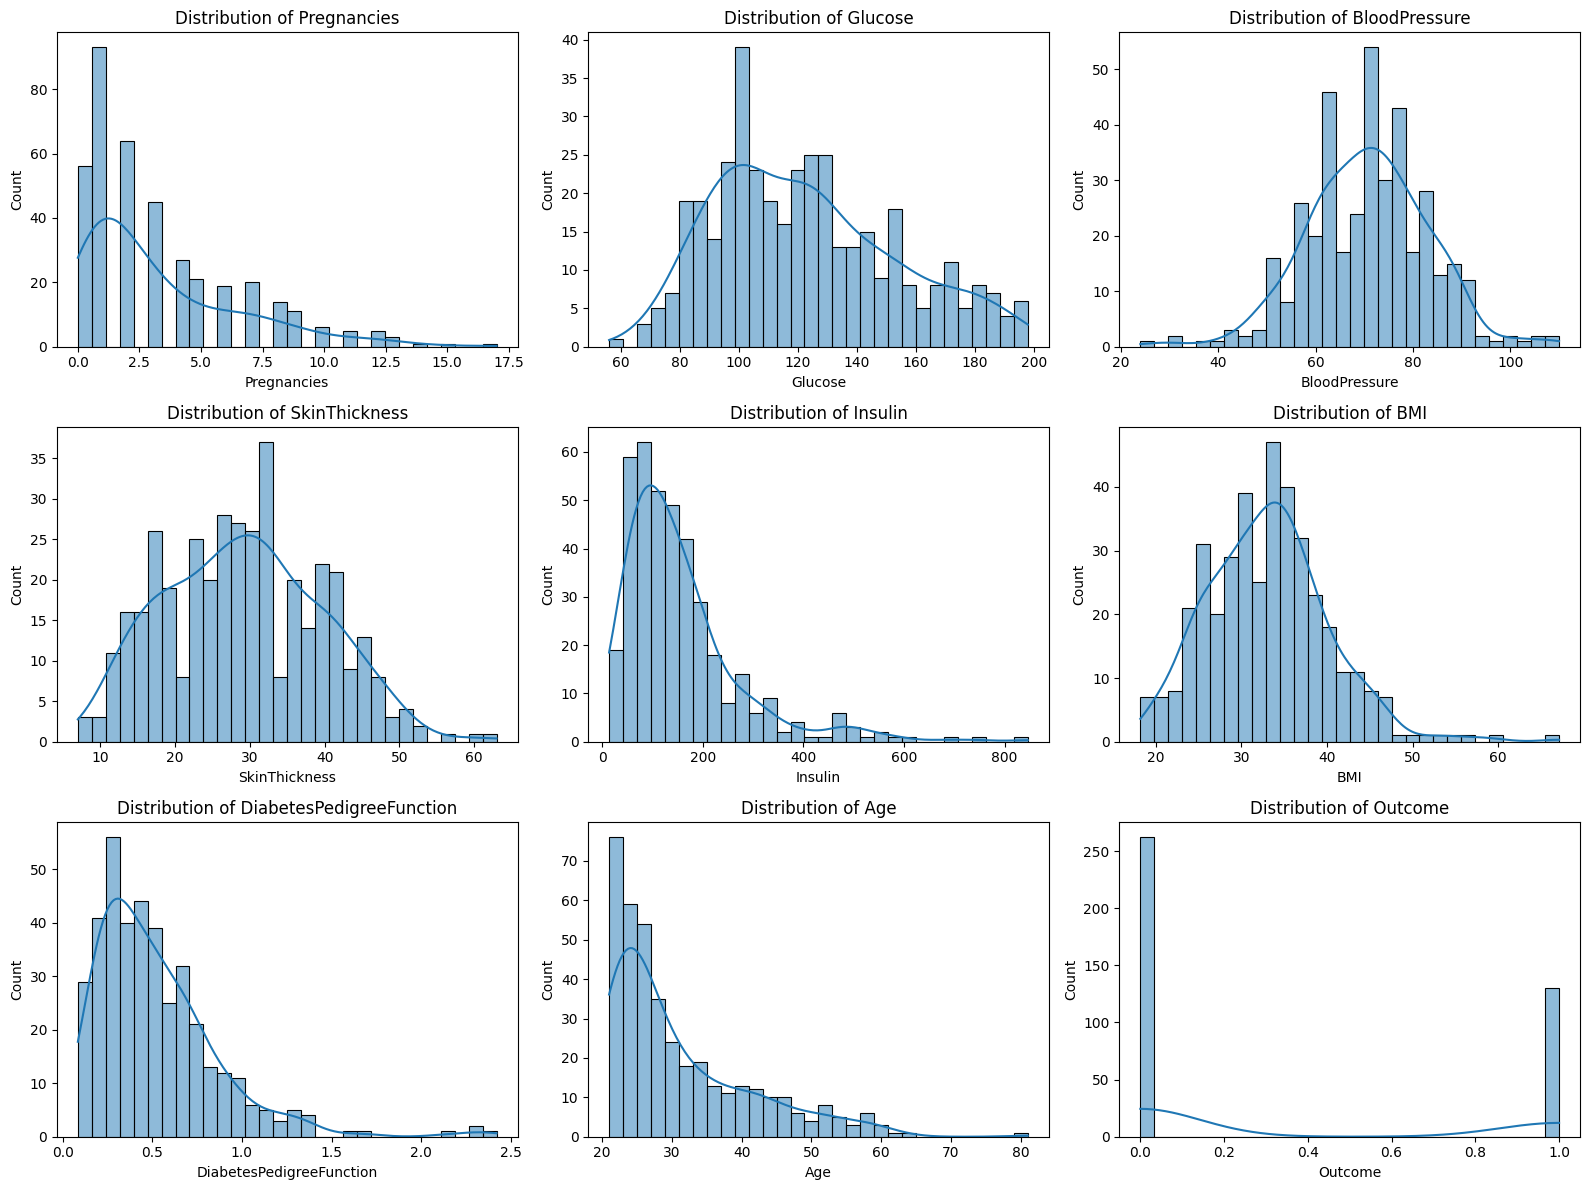

<ipython-input-3-a5c02ef9d009>:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Outcome", data=df_clean, palette="Set2")


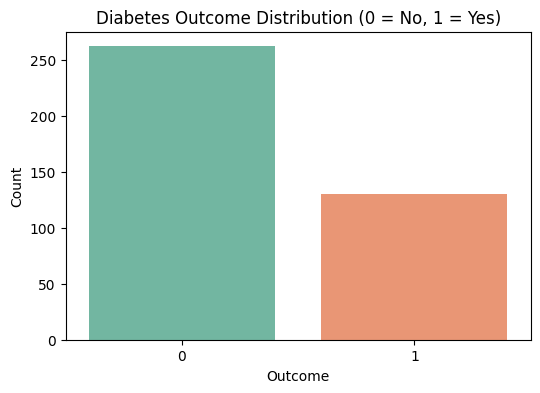

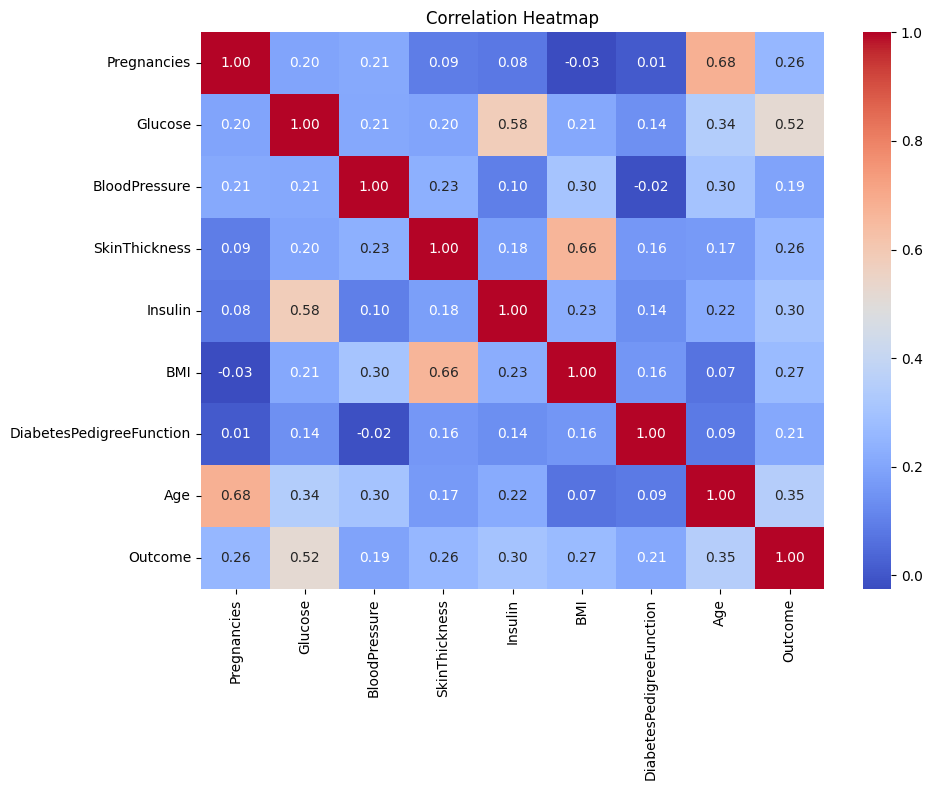


Average Feature Values by Outcome:
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           2.721374  111.431298      68.969466      27.251908  130.854962   
1           4.469231  145.192308      74.076923      32.961538  206.846154   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        31.750763                  0.472168  28.347328  
1        35.777692                  0.625585  35.938462  


<ipython-input-3-a5c02ef9d009>:134: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Outcome", y="Glucose", data=df_clean, palette="Set3")


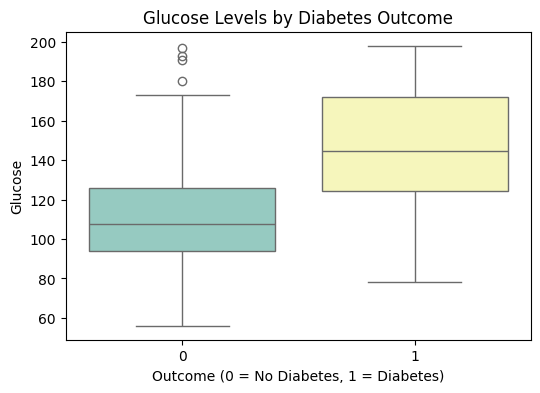


Training set shape: (313, 8)
Test set shape: (79, 8)

Machine Learning Model Performance:
Accuracy: 0.8354430379746836
Confusion Matrix:
 [[48  5]
 [ 8 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        53
           1       0.78      0.69      0.73        26

    accuracy                           0.84        79
   macro avg       0.82      0.80      0.81        79
weighted avg       0.83      0.84      0.83        79


Script execution complete!


In [3]:
"""
Diabetes Dataset Analysis and Prediction
------------------------------------------
This script downloads the latest diabetes dataset using kagglehub,
extracts and loads the CSV file, cleans and processes the data, and performs exploratory data analysis (EDA).
It then trains a Logistic Regression model to predict diabetes (Outcome)
and provides an interactive prompt to predict diabetes given user inputs.

Dataset Source:
    mathchi/diabetes-data-set
"""

import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------
# 1. Download Dataset via kagglehub
# --------------------------
import kagglehub

# Download the latest version of the diabetes dataset
dataset_path = kagglehub.dataset_download("mathchi/diabetes-data-set")
print("Path to dataset files:", dataset_path)

# --------------------------
# 2. Extract Dataset if Needed
# --------------------------
if dataset_path.endswith(".zip"):
    extract_dir = os.path.join(os.getcwd(), "diabetes_dataset")
    with zipfile.ZipFile(dataset_path, "r") as zip_ref:
        zip_ref.extractall(extract_dir)
    data_dir = extract_dir
else:
    data_dir = dataset_path

# --------------------------
# 3. Locate and Load the CSV File
# --------------------------
csv_files = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if file.endswith(".csv"):
            csv_files.append(os.path.join(root, file))

if not csv_files:
    raise ValueError("No CSV files found in the dataset directory.")

# Assume the first CSV file is our target file
csv_file_path = csv_files[0]
print("Using CSV file:", csv_file_path)

df = pd.read_csv(csv_file_path)
print("\nOriginal Data Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.head())

# --------------------------
# 4. Data Cleaning and Processing
# --------------------------
# (a) Clean column names: remove extra spaces and replace spaces with underscores
df.columns = [col.strip().replace(" ", "_") for col in df.columns]

# (b) For the well-known Pima Indians Diabetes dataset, the expected columns are:
#     'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#     'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
# In many cases, 0 is an invalid value for some features. Replace 0 with NaN for these features.
cols_with_invalid_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_invalid_zero:
    if col in df.columns:
        df[col] = df[col].replace(0, np.nan)

print("\nMissing values after replacing 0's with NaN:")
print(df.isnull().sum())

# (c) Drop rows with missing values (or use imputation if preferred)
df_clean = df.dropna()
print("\nCleaned Data Shape (after dropping missing values):", df_clean.shape)

# --------------------------
# 5. Exploratory Data Analysis (EDA)
# --------------------------
print("\nSummary Statistics:")
print(df_clean.describe())

# (a) Histograms for numerical features
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df_clean[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# (b) Outcome Distribution
if "Outcome" in df_clean.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Outcome", data=df_clean, palette="Set2")
    plt.title("Diabetes Outcome Distribution (0 = No, 1 = Yes)")
    plt.xlabel("Outcome")
    plt.ylabel("Count")
    plt.show()

# (c) Correlation Heatmap
plt.figure(figsize=(10,8))
corr = df_clean[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# --------------------------
# 6. Additional Analysis Examples
# --------------------------
# (a) Compare average values of features grouped by Outcome
if "Outcome" in df_clean.columns:
    group_means = df_clean.groupby("Outcome").mean()
    print("\nAverage Feature Values by Outcome:")
    print(group_means)

    # Example: Boxplot for Glucose by Outcome
    if "Glucose" in df_clean.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x="Outcome", y="Glucose", data=df_clean, palette="Set3")
        plt.title("Glucose Levels by Diabetes Outcome")
        plt.xlabel("Outcome (0 = No Diabetes, 1 = Diabetes)")
        plt.ylabel("Glucose")
        plt.show()

# --------------------------
# 7. Machine Learning Prediction Model
# --------------------------
# We will train a Logistic Regression model to predict diabetes (Outcome) using relevant features.
# Expected features: 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
#                    'DiabetesPedigreeFunction', 'Age'
expected_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                     'BMI', 'DiabetesPedigreeFunction', 'Age']
target = 'Outcome'

# Check if all expected features exist
missing_feats = [feat for feat in expected_features if feat not in df_clean.columns]
if missing_feats:
    raise ValueError(f"Missing expected feature columns: {missing_feats}")

X = df_clean[expected_features]
y = df_clean[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nTraining set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# Standardize the features
scaler_ml = StandardScaler()
X_train_scaled = scaler_ml.fit_transform(X_train)
X_test_scaled = scaler_ml.transform(X_test)

# Train a Logistic Regression model
model_ml = LogisticRegression(max_iter=1000, random_state=42)
model_ml.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model_ml.predict(X_test_scaled)
print("\nMachine Learning Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# --------------------------
# 8. Interactive Prediction for New Input
# --------------------------
def predict_diabetes(model, scaler):
    """
    Prompts the user for input values for each feature and predicts diabetes outcome.
    """
    print("\nEnter the following feature values to predict diabetes outcome:")
    user_data = {}
    for feat in expected_features:
        while True:
            try:
                value = float(input(f"{feat}: "))
                user_data[feat] = value
                break
            except ValueError:
                print("Please enter a valid numeric value.")
    # Convert the input into a DataFrame (with one row)
    user_df = pd.DataFrame([user_data])
    # Scale the input using the same scaler as the training data
    user_scaled = scaler.transform(user_df)
    prediction = model.predict(user_scaled)[0]
    result = "DIABETES detected" if prediction == 1 else "NO diabetes detected"
    print(f"\nPrediction: {result}")

# Uncomment the following line to enable interactive prediction.
# predict_diabetes(model_ml, scaler_ml)

print("\nScript execution complete!")
